<a href="https://colab.research.google.com/github/ebinjomonkottakal/Tensorflow_advanced/blob/main/MNIST_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Prepare the Dataset

In [14]:
def map_image(image,label):
  image = tf.cast(image,tf.float32)
  image = image/255.0
  image = tf.reshape(image,shape=(784,))
  return image,image

In [15]:
# load the train and test sets from tfds
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024
train_dataset = tfds.load('mnist',as_supervised = True,split='train')
train_dataset = train_dataset.map(map_image).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()
test_dataset = tfds.load('mnist',as_supervised=True,split='test')
test_dataset = test_dataset.map(map_image).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# Build the model

In [16]:
def simple_autoencoder(inputs):
  encoder = tf.keras.layers.Dense(units=32,activation='relu')(inputs)
  decoder = tf.keras.layers.Dense(units=784,activation='sigmoid')(encoder)
  return encoder,decoder

inputs = tf.keras.layers.Input(shape=(784,))
encoder_output, decoder_output = simple_autoencoder(inputs)
encoder_model = tf.keras.Model(inputs=inputs,outputs = encoder_output)
auto_encoder_model = tf.keras.Model(inputs=inputs,outputs = decoder_output)

In [17]:
auto_encoder_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy'
)

In [18]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = auto_encoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 7s 11ms/step - loss: 0.2260
Epoch 2/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1424
Epoch 3/50
468/468 [==============================] - 4s 9ms/step - loss: 0.1203
Epoch 4/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1087
Epoch 5/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1021
Epoch 6/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0983
Epoch 7/50
468/468 [==============================] - 4s 8ms/step - loss: 0.0965
Epoch 8/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0954
Epoch 9/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0949
Epoch 10/50
468/468 [==============================] - 4s 9ms/step - loss: 0.0944
Epoch 11/50
468/468 [==============================] - 4s 8ms/step - loss: 0.0941
Epoch 12/50
468/468 [==============================] - 3s 6ms/step - loss: 0.0939
Epoch 13/50
468/468 [===

In [19]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 [==============================] - 0s 230ms/step


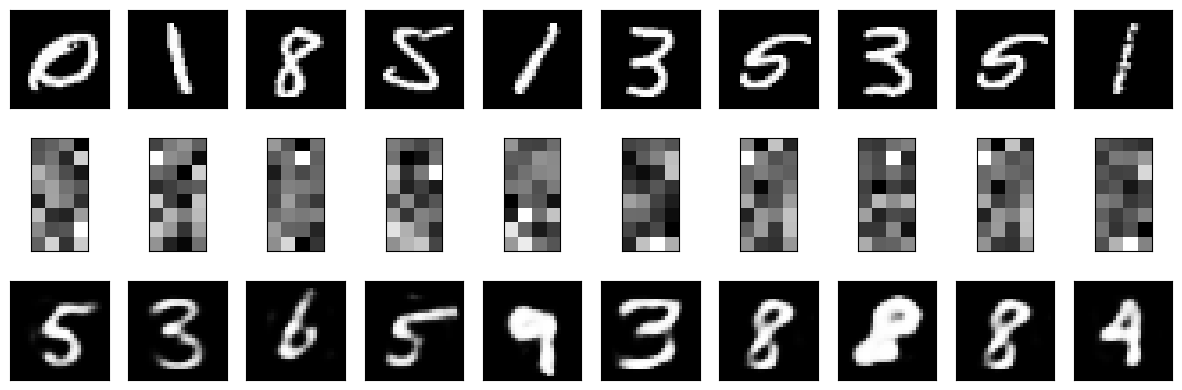

In [20]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = auto_encoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])